In [2]:
%matplotlib inline

import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

from torchviz import make_dot

# Backprop and SGD

In [3]:
bs = 1024
mu = 1
x0 = torch.randn(bs,1) + mu
print(x0.shape)

# f_theta(x) = x + theta
def f(x,theta):
    return x + theta

torch.Size([1024, 1])


tensor([1.], requires_grad=True)
init theta tensor([1.], requires_grad=True)


/home/zsx/anaconda3/envs/wph/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729128610/work/torch/csrc/utils/python_arg_parser.cpp:882.)


Text(0.5, 1.0, 'grad list')

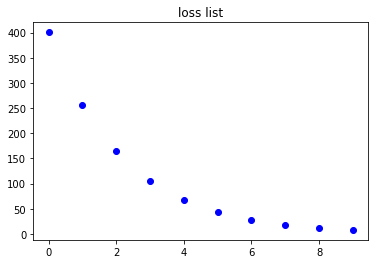

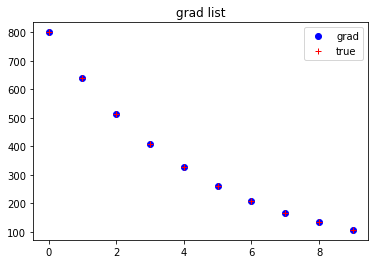

In [4]:
# OPTIMIZE WITH GD
theta = torch.tensor([1.0], requires_grad=True) # 
print(theta)

T = 20
#theta1 = theta
print('init theta',theta)
loss_lst = []
grad_lst = []
true_grad_lst = []
maxite = 10
eta = 0.1
etat = eta / (T**2) # STEP SIZE
for ite in range(1,maxite+1):    
    xt =  x0
    for t in range(1,T+1):
        #print(ite,t)
        xt = f(xt,theta)
    losst = torch.mean((xt - mu)**2)
    #print('loss',losst)
    loss_lst.append(losst)
    losst.backward()
    
    grad_lst.append(theta.grad.item())
    true_grad_lst.append(2*theta*T*T)
    
    theta.data.add_(-etat,theta.grad)    
    theta.grad.zero_()
    
    #print('grad', theta.grad, 'expect:',2*((ite*theta)*ite))
    
plt.figure()
plt.plot(loss_lst,'ob')
plt.title('loss list')

plt.figure()
plt.plot(grad_lst,'ob')
plt.plot(true_grad_lst,'r+')
plt.legend(['grad','true'])
plt.title('grad list')

tensor([1.], requires_grad=True)
init theta tensor([1.], requires_grad=True)


(0.0, 1.1)

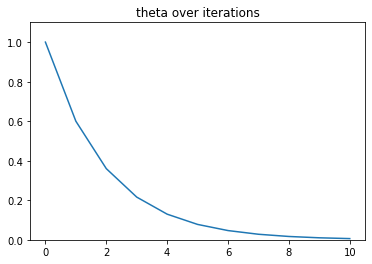

In [5]:
# USE SGD in Pytorch
theta = torch.tensor([1.0], requires_grad=True) # 
print(theta)

T = 200
eta = 0.2
print('init theta',theta)
optimizer = torch.optim.SGD([theta],lr=eta  / (T**2) )
total = 10
theta_lst = []
theta_lst.append(theta.detach().clone())

for ite in range(1,total+1):   
    optimizer.zero_grad()
    xt =  x0
    for t in range(1,T+1):
        #print(ite,t)
        xt = f(xt,theta)        
    losst = torch.mean((xt - mu)**2)
    
    #print('loss',losst)
    losst.backward(retain_graph=True)
    
    #print('grad', theta.grad, 'expect:',2*((ite*theta)*ite))
    optimizer.step()
    theta_lst.append(theta.detach().clone())
    
plt.figure()
plt.plot(theta_lst)
plt.title('theta over iterations')
plt.ylim([0,1.1])

# GRAPH

In [6]:
theta = torch.tensor([1.0], requires_grad=True) # 
print(theta)
bs = 1024
x0 = torch.randn(bs,1)
print(x0.shape)
def f(x,theta):
    return x + theta

tensor([1.], requires_grad=True)
torch.Size([1024, 1])


In [7]:
# computation
T = 3
xt = x0
for t in range(1,T+1):
    xt = f(xt,theta)
loss = torch.mean((xt - 1)**2)
print(loss)
loss.backward()
print(theta.grad)
print(2*((T*theta-1)*T))
theta.grad.zero_()

tensor(4.8863, grad_fn=<MeanBackward0>)
tensor([11.9442])
tensor([12.], grad_fn=<MulBackward0>)


tensor([0.])

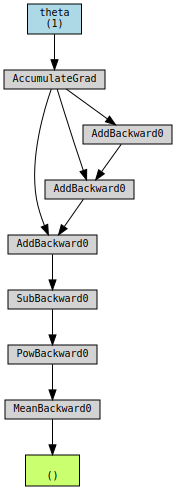

In [9]:
make_dot(loss, params=dict({'theta':theta}))